<a href="https://colab.research.google.com/github/BernieHuang2008/3d-gesture-keypoint-detect/blob/main/test1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

CMU DATASET:

http://domedb.perception.cs.cmu.edu/panopticDB/hands/hand143_panopticdb.tar

[INIT ENV]: Download local dataset

In [ ]:
!wget http://domedb.perception.cs.cmu.edu/panopticDB/hands/hand143_panopticdb.tar
!tar -xf hand143_panopticdb.tar
!rm hand143_panopticdb.tar

Run CMU's example for testing.

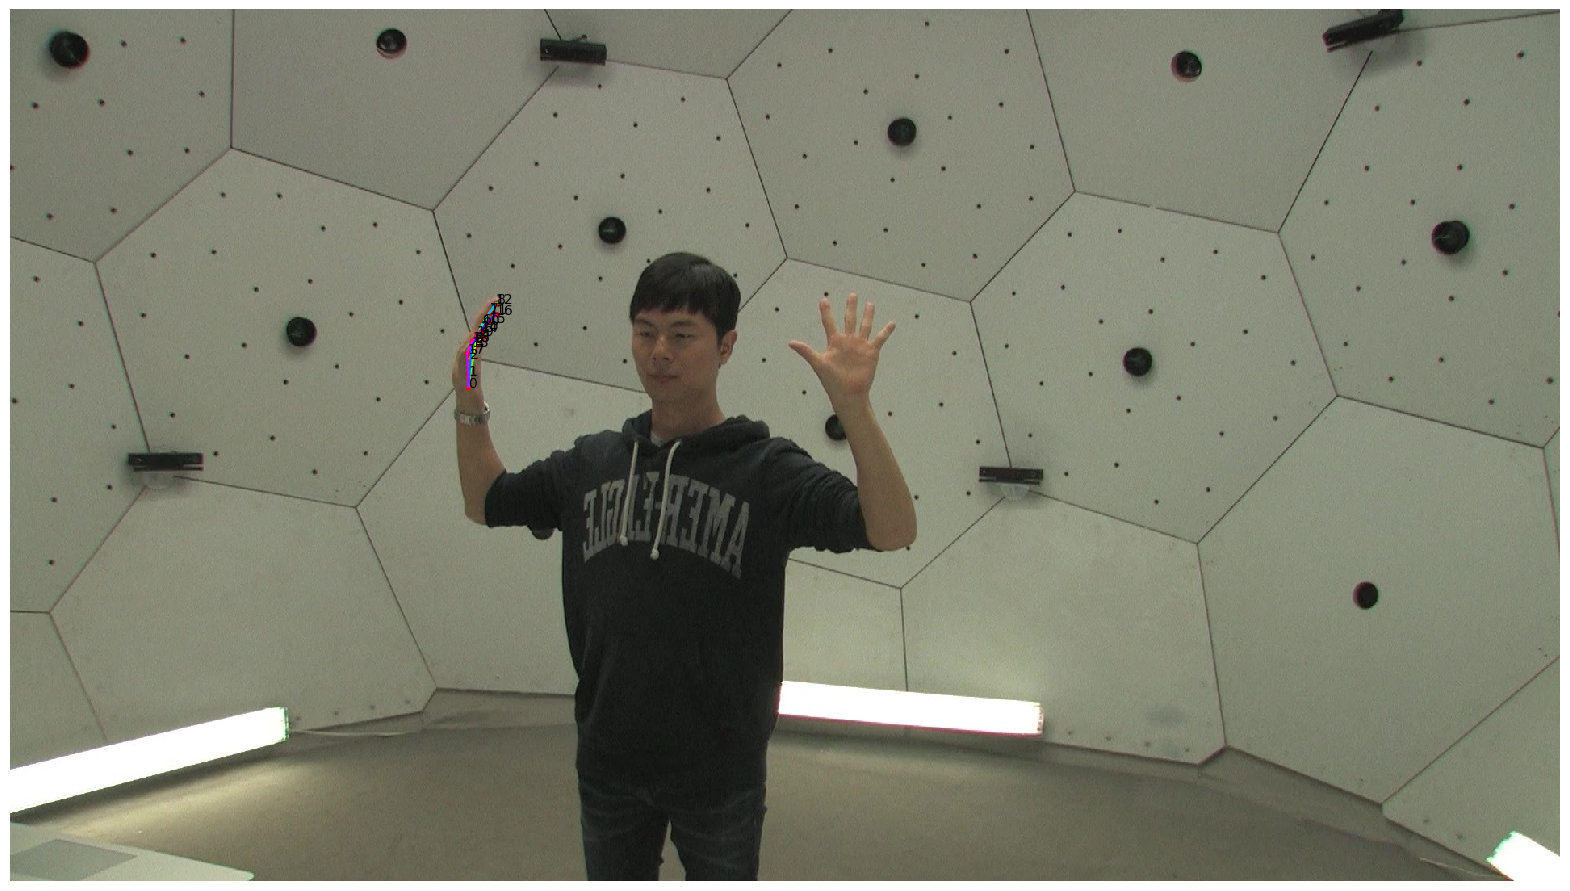

In [24]:
import os
import os.path
import numpy as np
import json
import matplotlib
import matplotlib.pyplot as plt

%matplotlib inline
plt.rcParams['figure.figsize'] = (20,20)
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'

edges = [[0,1],[1,2],[2,3],[3,4],[0,5],[5,6],[6,7],[7,8],[0,9],[9,10],[10,11],[11,12],[0,13],[13,14],[14,15],[15,16],[0,17],[17,18],[18,19],[19,20]]

outpath = './output_viz/'
if not os.path.isdir(outpath):
    os.makedirs(outpath)

# Input data paths
folderPath ='cmu_database/' #Put your local path here
jsonPath = folderPath +'hands_v143_14817.json'

with open(jsonPath, 'r') as fid:
    dat_all = json.load(fid)
    dat_all = dat_all['root']


dat = dat_all[0]; #Choose one element as an example;
pts = np.array(dat['joint_self'])
invalid = pts[:,2]!=1


imgPath = folderPath + dat['img_paths'];
# Plot annotations
plt.clf()
im = plt.imread(imgPath)
plt.imshow(im)

for p in range(pts.shape[0]):
    if pts[p,2]!=0:
        plt.plot(pts[p,0], pts[p,1],'r.')
        plt.text(pts[p,0], pts[p,1], '{0}'.format(p))
for ie, e in enumerate(edges):
    if np.all(pts[e,2]!=0):
        rgb = matplotlib.colors.hsv_to_rgb([ie/float(len(edges)),1.0,1.0])
        plt.plot(pts[e,0],pts[e,1],color=rgb)
plt.axis('off')
dat['img_paths']
plt.savefig(outpath+dat['img_paths'][5:-5]+'.jpg', bbox_inches='tight')